# Script for Cleaning raw files

In [39]:
import os
import tqdm
import datetime
import numpy as np
import pandas as pd
from collections import  Counter
from IPython.display import clear_output


In [40]:
def copy_PATH(src  = '/media/rdverse/Hippocampus/faceData/data', dest = '.'):
    """ create a link for data path in current dir
    args:
        dest (str) : where you want to create the symbolic link
    Returns:
        PATH of data directory
    """
    
    while not os.path.isdir(src):
        src = input("Enter path of data dir here")
                
    if not os.path.exists('data'):
        os.symlink(PATH, 'data')

    return 'data'

PATH = copy_PATH() 


# Functions to clean raw data file

In [41]:
def get_resultants(dataDf):
    """load resultant

    Args:
        dataDf (pd : df): loaded dataframe with raw data

    Returns:
        pd : df: loaded df with resultant columns
    """
    
    colsNeeded = ['Accel_LN_', 'Accel_WR_', 'Gyro_','Mag_']
    
    for colRes in colsNeeded:
        try:
            dataDf['Resultant_' + colRes] = np.sqrt(np.square(dataDf[colRes + 'X_CAL']) + 
                                            np.square(dataDf[colRes + 'Y_CAL']) + 
                                            np.square(dataDf[colRes + 'Z_CAL']))
        except:
            print("Issue with %s" % colRes)

    return dataDf

def process_rawdata(PATH):
    """load raw data

    Args:
        PATH (str): path to the file

    Returns:
        pd : df: raw data with resultant and timestamp loaded
    """
    #read file
    dataDf = pd.read_csv(PATH, sep = '\t', header=0)
    #drop last col with nan
    dataDf.dropna(axis=1, inplace = True)
    #rename cols
    newColNames = [name + '_' + dataDf.iloc[1].values[i] for i,name in enumerate(dataDf.iloc[0].values)]
    # change header
    dataDf = dataDf.set_axis(newColNames, axis=1, inplace=False)[3:].reset_index(drop=True)
    # switch values to float
    dataDf = dataDf.astype(float)
    # get resultant vals
    dataDf = get_resultants(dataDf)
    # add time to df
    rawTime = file_name_splitter(PATH, type='d')
    dataDf['TimeStamp'] = [datetime.datetime.strptime(str(rawTime), "%Y%m%d%H%M%S") +
                       datetime.timedelta(0,v/102.4) for v in dataDf.index+1]
    # return df
    return dataDf

# String operations

In [42]:
def file_name_splitter(name, type='d'):
    """
    get file name or the date string
    Args:
        name ([type]): [description]
        type (str, optional): [description]. Defaults to 'd'.

    Returns:
        str: string or filename
    """
    if type=='d':
        item = ''.join([n for n in name if n.isdigit()])
        item = int(item)
    
    else:
        item = ''.join([n for n in name if not n.isdigit()])
    return item


# File sanity checker

In [43]:
def check_file_counts(Path = 'data', count = 1):
    """
    level1 cleaning : check number of files, check for duplocites. Count > n will be returned
    Args:
        Path (str, optional): location tags or raw. Defaults to 'data'.
        count (int, optional): frequency limit. Defaults to 1.

    Returns:
        list: list of files that need to be checked 
    """
    filteredFiles = dict()
    for root, dirs,files in os.walk(Path):
        files = [file_name_splitter(f,type='s') for f in files]
        filesDict = Counter(files)
        filesDict = dict(filter(lambda item: item[1]>count, filesDict.items()))
        filteredFiles.update(filesDict)
    return filteredFiles

check_file_counts(Path = 'data/unclean/tag')
    
def _tyu_verify(arr):
    """Check if given list has tyu sequence

    Args:
        arr (list): list of tyu's  

    Returns:
        bool: bool
    """
    arr = np.array(arr)
    arr = arr.reshape(int(len(arr)/3),3)
    for item in arr:
        if ''.join(item)!='tyu':
            return True
    return False

def check_tyu_pattern(Path):
    """
        checks length if length is a multiple of 3 and then checks for tyu pattern
    Args:
        Path (std): path to file

    Returns:
        list (n,2): list of filePATHs and problem zipped together 
    """
    problemFiles = list()
    problemType = list()

    for root, dirs,files in os.walk(Path):

        for file in files:
            df = pd.read_csv(os.path.join(root, file))
            tyuList = df.status.values
            if len(tyuList)%3!=0:
                problemFiles.append(file)
                problemType.append("Length")

            elif _tyu_verify(tyuList):
                problemFiles.append(file)
                problemType.append("tyuPattern")

    return list(zip(problemFiles,problemType))

In [44]:
prob =check_tyu_pattern("data/unclean/tags")
print(len(prob))
prob


0


[]

In [46]:
#df.iloc[df.index.get_loc(datetime.datetime(2016,2,2),method='nearest')]
rawDf, tagDf = _get_raw_tag_df('data/unclean/raw/a','20210911110355a_le_sit.csv')

In [47]:
rawDf.columns

Index(['Accel_LN_X_UNCAL', 'Accel_LN_X_CAL', 'Accel_LN_Y_UNCAL',
       'Accel_LN_Y_CAL', 'Accel_LN_Z_UNCAL', 'Accel_LN_Z_CAL', 'Mag_Z_CAL',
       'Mag_Z_UNCAL', 'Mag_X_CAL', 'Mag_X_UNCAL',
       'System_Timestamp_Plot_Zeroed_CAL', 'Mag_Y_UNCAL', 'Mag_Y_CAL',
       'Temperature_BMP280_UNCAL', 'Temperature_BMP280_CAL', 'Gyro_Z_CAL',
       'Gyro_Z_UNCAL', 'Timestamp_UNCAL', 'Timestamp_CAL', 'Gyro_X_UNCAL',
       'Gyro_X_CAL', 'Gyro_Y_CAL', 'Gyro_Y_UNCAL', 'Battery_CAL',
       'Battery_UNCAL', 'Accel_WR_Z_UNCAL', 'Accel_WR_Z_CAL', 'Accel_WR_Y_CAL',
       'Accel_WR_Y_UNCAL', 'Pressure_BMP280_CAL', 'Pressure_BMP280_UNCAL',
       'Accel_WR_X_UNCAL', 'Accel_WR_X_CAL', 'Resultant_Accel_LN_',
       'Resultant_Accel_WR_', 'Resultant_Gyro_', 'Resultant_Mag_',
       'TimeStamp'],
      dtype='object')

In [56]:

def _get_raw_tag_df(root, file):
    """ Load dfs

    Args:
        root (str): root name of file
        file (str): file name

    Returns:
        (df, df): 2 raw and tag dfs 
    """
    filePathRaw = os.path.join(root, file)
    filePathTag = os.path.join("data/unclean/tags/" + root[-1], file_name_splitter(file, type='s'))
    rawDf = process_rawdata(filePathRaw)
    tagDf = pd.read_csv(filePathTag)
    return rawDf, tagDf

def _pull_pid(name):
    name = file_name_splitter(name,type='s')
    name = name.split('_')[0]
    return name

def _pull_description(name):
    """ get the activity description
    Args:
        name (str): fileName 
    Returns:
        str: activity description
    """
    name = file_name_splitter(name,type='s')
    desc = name.strip('.csv').split("_")[1:]
    desc = '_'.join(desc)
    return desc

def _pull_label(name):
    """get the activity description

   Args:
        name (str): fileName 

    Returns:
        str: activity label (1,0)
    """
    name = file_name_splitter(name,type='s')
    if name.split('_')[1] in ['le', 're', 'n', 'm']:
        label = 1
    else:
        label = 0
    return label

def _pull_feature(root, file):
    """ takes a single df and extracts features

    Args:
        root (str): root name of file
        file (str): file name

    Returns:
        [type]: features df either static or dynamic
    """
    feats =list()
    rawDf, tagDf = _get_raw_tag_df(root, file)
    # filter touch points
    tagDf = tagDf[tagDf["status"]=="y"]

    fileParts = file.strip(".csv").split("_")

    feats = list()
    if fileParts[2]==fileParts[1]:
        feats = __type_static(rawDf,tagDf)
    else:
        feats = __type_dynamic(rawDf,tagDf)

    return feats

def __type_dynamic(rawDf, tagDf):
    """ for dynamic activities

    Args:
        rawDf (df): raw data
        tagDf (df): tags data

    Returns:
        features
    """
    feats = list()
    for tPoint in tagDf.time.values:
        try:
            index = rawDf.iloc[rawDf.set_index('TimeStamp').index.get_loc(tPoint ,method='nearest')].name
            
            #feat = rawDf.Resultant_Accel_LN_[index-30:index+20].values
            feat = rawDf[["Accel_LN_X_CAL","Accel_LN_Y_CAL","Accel_LN_Z_CAL",  "Resultant_Accel_LN_", "Gyro_X_CAL", "Gyro_Y_CAL", "Gyro_Z_CAL", "Resultant_Gyro_"]][index-50:index].values#.flatten()
            
            if feat.shape==(50,8):
                feats.append(feat)
        
        except:
            pass

    return feats

def __type_static(rawDf,tagDf):
    """ for static activities

    Args:
        rawDf (df): raw data
        tagDf (df): tags data

    Returns:
        features
    """
    feats = list()
    length = len(rawDf)
    rawDf = rawDf[100:length-100]
    
    length = 1000#len(rawDf) - len(rawDf)%50
    rawDf = rawDf[:length]

    #feats = rawDf.Resultant_Accel_LN_.values.reshape(int(length/50),50)
    feats = rawDf[["Accel_LN_X_CAL","Accel_LN_Y_CAL","Accel_LN_Z_CAL",  "Resultant_Accel_LN_", "Gyro_X_CAL", "Gyro_Y_CAL", "Gyro_Z_CAL", "Resultant_Gyro_"]].values.reshape(int(length/50),50,8)#.flatten().reshape(int(length/50),150)
    
    feats = list(feats)
    #print("static feats length %d" %len(feats))
    return feats


features = list()
labels = list()
descriptions = list()
pids = list()
for root,dirs,files in tqdm.tqdm(os.walk("data/unclean/raw")):
    for file in files:
        rawDf, tagDf = _get_raw_tag_df(root, file)
        
        description = _pull_description(file)
        label = _pull_label(file)
        feature = _pull_feature(root,file)
        pid = _pull_pid(file)
        descriptions.extend([description]*len(feature))
        labels.extend([label]*len(feature))
        pids.extend([pid]*len(feature))
        features.extend(feature)
        #break

0it [00:00, ?it/s]/tmp/ipykernel_48095/3567576627.py:13: DtypeWarning: Columns (0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32) have mixed types.Specify dtype option on import or set low_memory=False.
  rawDf = process_rawdata(filePathRaw)
11it [00:41,  3.77s/it]


In [77]:
features = np.array(features)
labels = np.array(labels)
descriptions = np.array(descriptions)
pids = np.array(pids)
labels_descriptions = np.hstack((pids.reshape(-1,1),descriptions.reshape(-1,1),labels.reshape(-1,1)))

In [84]:
s = features.shape
feat2D = features.reshape(s[0], s[1]*s[2])
np.savetxt("features50_8.txt",feat2D)
np.savetxt("labels50_8.txt",labels_descriptions,fmt = "%s %s %s")

array([['i', 'i_wal', '0'],
       ['i', 'i_wal', '0'],
       ['i', 'i_wal', '0'],
       ...,
       ['e', 'sh_sta', '0'],
       ['e', 'sh_sta', '0'],
       ['e', 'sh_sta', '0']], dtype='<U21')

In [71]:
s = features.shape
features[0][0]#.reshape(s[0], s[1]*s[2])

array([   0.61956522,    2.60869565,   -0.61956522,    2.75191118,
       -104.72560976,  -42.65243902,  -10.48780488,  113.56354144])

In [73]:
s = features.shape
features.reshape(s[0], s[1]*s[2]).reshape(s[0], s[1], s[2])[0][0]

array([   0.61956522,    2.60869565,   -0.61956522,    2.75191118,
       -104.72560976,  -42.65243902,  -10.48780488,  113.56354144])

(4268, 50, 8)

In [22]:
import tensorflow as tf
from tensorflow.keras import layers
physical_devices = tf.config.list_physical_devices('GPU')
try:
    tf.config.experimental.set_memory_growth(physical_devices[0], True)
except:
    # Invalid device or cannot modify virtual devices once initi
    # alized.
    print('Could not initialize the tensorflow gpu')
    pass

2021-09-24 09:04:11.692418: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.10.1


Could not initialize the tensorflow gpu


2021-09-24 09:04:12.331705: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2021-09-24 09:04:12.332095: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcuda.so.1
2021-09-24 09:04:12.352404: E tensorflow/stream_executor/cuda/cuda_driver.cc:328] failed call to cuInit: CUDA_ERROR_UNKNOWN: unknown error
2021-09-24 09:04:12.352420: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:169] retrieving CUDA diagnostic information for host: ELSKY
2021-09-24 09:04:12.352424: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:176] hostname: ELSKY
2021-09-24 09:04:12.352480: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:200] libcuda reported version is: 460.91.3
2021-09-24 09:04:12.352492: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:204] kernel reported version is: 460.91.3
2021-09-24 09:04:12.352495: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:310] ker

In [23]:
input = layers.Input(shape = (50,3))
model = layers.Conv1D(50, kernel_size = 3, activation='relu')(input)
model = layers.GlobalAveragePooling1D()(model)
model = layers.Flatten()(model)

output = layers.Dense(1)(model)
model = tf.keras.Model(inputs=[input], outputs=output)
optimizer = tf.keras.optimizers.Adam(1e-3)
loss = tf.keras.losses.BinaryCrossentropy()
model.compile(loss = loss, optimizer=optimizer, metrics = ['accuracy'])

2021-09-24 09:04:12.626771: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2021-09-24 09:04:12.627200: I tensorflow/compiler/jit/xla_gpu_device.cc:99] Not creating XLA devices, tf_xla_enable_xla_devices not set


In [ ]:
pids

In [26]:
model.fit(X_Train,y_Train, epochs=200,validation_split=0.2,shuffle=True)
preds=model.predict(X_Test)

2021-09-24 09:04:31.982584: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:116] None of the MLIR optimization passes are enabled (registered 2)
2021-09-24 09:04:32.005993: I tensorflow/core/platform/profile_utils/cpu_utils.cc:112] CPU Frequency: 3593290000 Hz


Epoch 1/200
86/86 [==============================] - 0s 2ms/step - loss: 6.3409 - accuracy: 0.5373 - val_loss: 6.0783 - val_accuracy: 0.5593
Epoch 2/200
86/86 [==============================] - 0s 1ms/step - loss: 5.4222 - accuracy: 0.5859 - val_loss: 4.4387 - val_accuracy: 0.6369
Epoch 3/200
86/86 [==============================] - 0s 1ms/step - loss: 4.5728 - accuracy: 0.6281 - val_loss: 4.0902 - val_accuracy: 0.6574
Epoch 4/200
86/86 [==============================] - 0s 1ms/step - loss: 4.1648 - accuracy: 0.6411 - val_loss: 3.5913 - val_accuracy: 0.6794
Epoch 5/200
86/86 [==============================] - 0s 1ms/step - loss: 3.7039 - accuracy: 0.6052 - val_loss: 2.6059 - val_accuracy: 0.6281
Epoch 6/200
86/86 [==============================] - 0s 1ms/step - loss: 3.3989 - accuracy: 0.6051 - val_loss: 5.0774 - val_accuracy: 0.5827
Epoch 7/200
86/86 [==============================] - 0s 1ms/step - loss: 4.8653 - accuracy: 0.5893 - val_loss: 4.5875 - val_accuracy: 0.6193
Epoch 8/200
8

In [34]:
p = [1 if pp>0 else 0 for pp in preds]

In [35]:
from sklearn.metrics import accuracy_score
accuracy_score(p, y_Test)

0.5281030444964872

In [ ]:
# for root,dirs,files in tqdm.tqdm(os.walk("data/unclean/raw")):
#     for file in files:
#         rawDf, _ = _get_raw_tag_df(root, file)
#         description = _pull_description(file)
#         label = _pull_label(file)
#         feature = _pull_feature(root,file)
#         pid = _pull_pid(file)
#         descriptions.extend([description]*len(feature))
#         labels.extend([label]*len(feature))
#         pids.extend([pid]*len(feature))
#         features.extend(feature)

In [9]:
# for i,feature in enumerate(features):
#     if len(feature)!=50:
#         print(len(feature))

In [14]:
label, description

(0, 'sh_sta')

In [17]:
np.array(features).shape

(4266, 150)

In [169]:
fileParts = file.strip(".csv").split("_")


In [25]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

X_Train, X_Test, y_Train, y_Test = train_test_split(features, labels, random_state=43, test_size=0.2, shuffle=True)

rf = RandomForestClassifier(n_estimators=1)

rf.fit(X_Train, y_Train)

rf.score(X_Test,y_Test)

ValueError: Found array with dim 3. Estimator expected <= 2.

In [172]:
np.array(features).shape, np.array(labels).shape, np.array(descriptions).shape

((4266, 150), (4266,), (4266,))

In [173]:
Counter(descriptions)

Counter({'i_wal': 144,
         'le_sta': 181,
         'wal_wal': 200,
         're_sit': 185,
         're_sta': 184,
         'sta_sta': 180,
         'n_sta': 179,
         're_wal': 178,
         'sit_sit': 180,
         'n_sit': 190,
         'i_sta': 181,
         'n_wal': 173,
         'sc_sta': 175,
         'sc_sit': 186,
         'sh_sta': 180,
         'sc_wal': 175,
         'i_sit': 149,
         'le_wal': 186,
         'sh_wal': 176,
         'm_sta': 180,
         'm_wal': 179,
         'sh_sit': 152,
         'le_sit': 182,
         'm_sit': 191})

In [101]:
from sklearn.model_selection import GridSearchCV

rf = RandomForestClassifier(n_jobs=-1)


param_grid = {
    'max_depth': [3,5,10],
    'min_samples_leaf': [15,25, 40],
    'min_samples_split': [20,40,60],
    'n_estimators': [50,100,200,300]
}

grid = GridSearchCV(rf, param_grid, verbose=3, n_jobs=-1, cv=3)

In [102]:
grid.fit(X_Train, y_Train)

Fitting 3 folds for each of 108 candidates, totalling 324 fits


/home/rdverse/anaconda3/envs/facePy/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/rdverse/anaconda3/envs/facePy/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/rdverse/anaconda3/envs/facePy/lib/python3.9/site-packages/sklearn/ensemble/_forest.py", line 304, in fit
    X, y = self._validate_data(X, y, multi_output=True,
  File "/home/rdverse/anaconda3/envs/facePy/lib/python3.9/site-packages/sklearn/base.py", line 433, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "/home/rdverse/anaconda3/envs/facePy/lib/python3.9/site-packages/sklearn/utils/validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "/home/rdverse/anaconda3/envs/facePy/lib/

[CV 3/3] END max_depth=3, min_samples_leaf=15, min_samples_split=20, n_estimators=50;, score=nan total time=   0.0s
[CV 2/3] END max_depth=3, min_samples_leaf=15, min_samples_split=20, n_estimators=50;, score=nan total time=   0.0s
[CV 1/3] END max_depth=3, min_samples_leaf=15, min_samples_split=20, n_estimators=50;, score=nan total time=   0.0s
[CV 1/3] END max_depth=3, min_samples_leaf=15, min_samples_split=20, n_estimators=100;, score=nan total time=   0.0s
[CV 1/3] END max_depth=3, min_samples_leaf=15, min_samples_split=20, n_estimators=200;, score=nan total time=   0.0s
[CV 3/3] END max_depth=3, min_samples_leaf=15, min_samples_split=20, n_estimators=200;, score=nan total time=   0.0s
[CV 3/3] END max_depth=3, min_samples_leaf=15, min_samples_split=20, n_estimators=100;, score=nan total time=   0.0s
[CV 2/3] END max_depth=3, min_samples_leaf=15, min_samples_split=20, n_estimators=100;, score=nan total time=   0.0s
[CV 2/3] END max_depth=3, min_samples_leaf=15, min_samples_split=40

)
  File "/home/rdverse/anaconda3/envs/facePy/lib/python3.9/site-packages/sklearn/utils/validation.py", line 871, in check_X_y
    X = check_array(X, accept_sparse=accept_sparse,
  File "/home/rdverse/anaconda3/envs/facePy/lib/python3.9/site-packages/sklearn/utils/validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "/home/rdverse/anaconda3/envs/facePy/lib/python3.9/site-packages/sklearn/utils/validation.py", line 716, in check_array
    raise ValueError("Found array with dim %d. %s expected <= 2."
ValueError: Found array with dim 3. Estimator expected <= 2.

  warnings.warn("Estimator fit failed. The score on this train-test"
/home/rdverse/anaconda3/envs/facePy/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/rdverse/anaconda3/envs/facePy/lib/python3.9/site-packages/

[CV 2/3] END max_depth=5, min_samples_leaf=15, min_samples_split=60, n_estimators=100;, score=nan total time=   0.0s
[CV 2/3] END max_depth=5, min_samples_leaf=15, min_samples_split=40, n_estimators=200;, score=nan total time=   0.0s
[CV 3/3] END max_depth=5, min_samples_leaf=15, min_samples_split=60, n_estimators=200;, score=nan total time=   0.0s
[CV 2/3] END max_depth=5, min_samples_leaf=15, min_samples_split=60, n_estimators=50;, score=nan total time=   0.0s
[CV 2/3] END max_depth=5, min_samples_leaf=15, min_samples_split=40, n_estimators=300;, score=nan total time=   0.0s
[CV 3/3] END max_depth=5, min_samples_leaf=15, min_samples_split=60, n_estimators=100;, score=nan total time=   0.0s
[CV 1/3] END max_depth=5, min_samples_leaf=25, min_samples_split=20, n_estimators=50;, score=nan total time=   0.0s
[CV 2/3] END max_depth=5, min_samples_leaf=25, min_samples_split=20, n_estimators=100;, score=nan total time=   0.0s
[CV 1/3] END max_depth=5, min_samples_leaf=15, min_samples_split=6

ValueError: Found array with dim 3. Estimator expected <= 2.

In [181]:
select = grid.best_estimator_
select.fit(X_Train,y_Train)

RandomForestClassifier(max_depth=10, min_samples_leaf=15, min_samples_split=20,
                       n_estimators=200, n_jobs=-1)

In [182]:
select.score(X_Test, y_Test)

0.7810304449648712

In [183]:
from sklearn.metrics import classification_report
print(classification_report(y_Test, select.predict(X_Test)))

              precision    recall  f1-score   support

           0       0.81      0.71      0.76       416
           1       0.76      0.84      0.80       438

    accuracy                           0.78       854
   macro avg       0.79      0.78      0.78       854
weighted avg       0.78      0.78      0.78       854



# Load raw data and tags Files

In [17]:
fileName = "a_le_sit.csv"
tagsDf = pd.read_csv("../data/tags/b/b_m_sit.csv", index_col=[0])
dataDf = process_rawdata("../data/raw/b/20210910171401b_m_sit.csv")
tagsDf['time'] = pd.to_datetime(tagsDf.time) + datetime.timedelta(0,1)

In [19]:
import datetime

datetime.datetime.strptime('20210910105115', "%Y%m%d%H%M%S") + datetime.timedelta(0,1)

datetime.datetime(2021, 9, 10, 10, 51, 16)

In [20]:
dataDf['TimeStamp'] = [datetime.datetime.strptime('20210910105115', "%Y%m%d%H%M%S") +
                       datetime.timedelta(0,v/51) for v in dataDf.index+1]

ValueError: cannot reshape array of size 102 into shape (27,3,2)

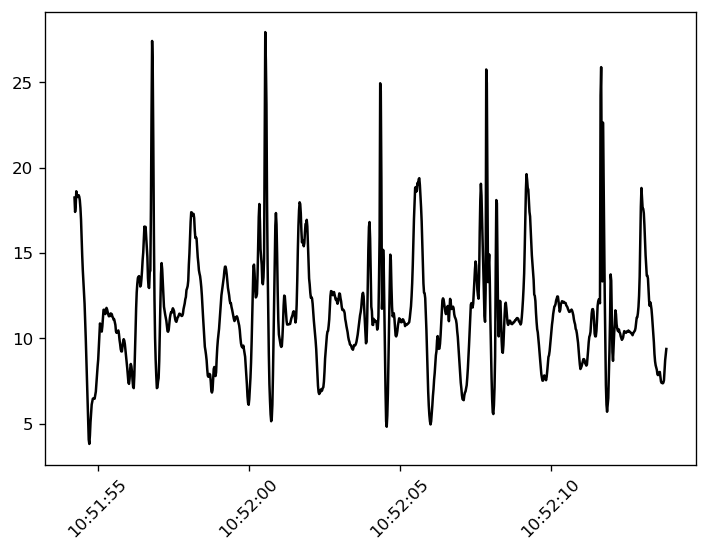

In [21]:
plt.figure(figsize = (7,5),dpi=120)

#plt.plot(dataDf.TimeStamp[2000:3000],dataDf.Resultant_Accel_LN_[:1000])

plt.plot(dataDf.TimeStamp[2000:3000],dataDf.Resultant_Accel_LN_[2000:3000], color='black')

# plt.plot(dataDf.TimeStamp[2000:3000],dataDf.Accel_LN_X_CAL[2000:3000], label = 'x-Accel')
# plt.plot(dataDf.TimeStamp[2000:3000],dataDf.Accel_LN_Y_CAL[2000:3000], label = 'y-Accel')
# plt.plot(dataDf.TimeStamp[2000:3000],dataDf.Accel_LN_Z_CAL[2000:3000], label = 'z-Accel')

plt.xticks(rotation=45)

# d = data['Date'].values
# plt.fill_between(d, data['A'], data['B'],
#                 where=data['A'] >= data['B'],
#                 facecolor='green', alpha=0.2, interpolate=True)


for i,bar in enumerate(tagsDf.values.reshape(27,3,2)[8:13]):
    times = np.take(bar,0, axis=1)
    times = [t - datetime.timedelta(0,1) for t in times]
    a = times[0]
    b = times[1]
    vals = dataDf.Resultant_Accel_LN_[2000:3000]
    #vals = [0,25]
    if i==0:
        plt.fill_between([times[0],times[1]], np.min(vals), np.max(vals), alpha =0.6, color = 'gray', label = "transition to touch")
        plt.fill_between([times[1],times[2]], np.min(vals), np.max(vals), alpha =0.6, color = 'pink', label = "touch left eye")
    else:
        plt.fill_between([times[0],times[1]], np.min(vals), np.max(vals), alpha =0.6, color = 'gray')
        plt.fill_between([times[1],times[2]], np.min(vals), np.max(vals), alpha =0.6, color = 'pink')
        
plt.xlabel("Time (HH:MM:SS)")
    #plt.fill_between([times[1],times[2]], np.min(vals), np.max(vals), alpha =0.6, color = 'yellow')

    # #     plt.fill_between(np.take(bar,0))
    
# #     print(np.take(bar,0))
# #     pos= np.sum(np.take(bar,0))
# #     print(pos)
#     plt.bar(np.take(bar,0), 27.5, datetime.timedelta(0,20))
    
#     val= [max_val]
#     width = [bar[2][0]-bar[0][0]]
#     ax2.bar(pos,val,width, color = 'black', alpha = 0.1)
plt.legend()
#plt.savefig("r.png")
plt.show()
#plt.bar()
%matplotlib inline

In [216]:
for val in tagsDf.values.reshape(27,3,2)[:4]:
    print(np.take(val,0, axis=1))

[Timestamp('2021-09-10 10:51:18.262964')
 Timestamp('2021-09-10 10:51:18.868621')
 Timestamp('2021-09-10 10:51:19.556485')]
[Timestamp('2021-09-10 10:51:20.405710')
 Timestamp('2021-09-10 10:51:20.976593')
 Timestamp('2021-09-10 10:51:21.534269')]
[Timestamp('2021-09-10 10:51:22.402140')
 Timestamp('2021-09-10 10:51:22.926471')
 Timestamp('2021-09-10 10:51:23.642457')]
[Timestamp('2021-09-10 10:51:24.369033')
 Timestamp('2021-09-10 10:51:25.001542')
 Timestamp('2021-09-10 10:51:25.644294')]
